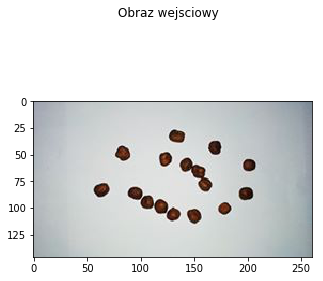

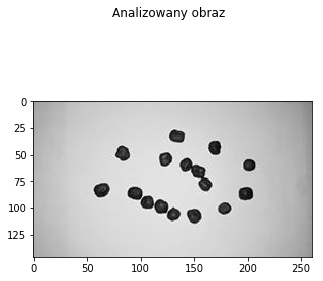

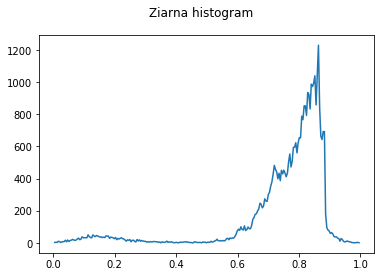

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure, filters
from scipy.spatial import distance
import math
from scipy import ndimage as ndi
import matplotlib.pyplot as plt



image=io.imread("./images/orzeszki3.jpg")
image2 = rgb2gray(image)


plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.axis('on')

plt.suptitle('Obraz wejsciowy')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(image2, cmap='gray')
plt.axis('on')

plt.suptitle('Analizowany obraz')
plt.show()

def plot_hist(image,title):
    
    hist,bins=exposure.histogram(image)
    
    plt.plot(bins, hist)
    plt.suptitle(title)
    plt.show()

plot_hist(image2, 'Ziarna histogram')

Prog binaryzacji wynosi:  0.482624600949755


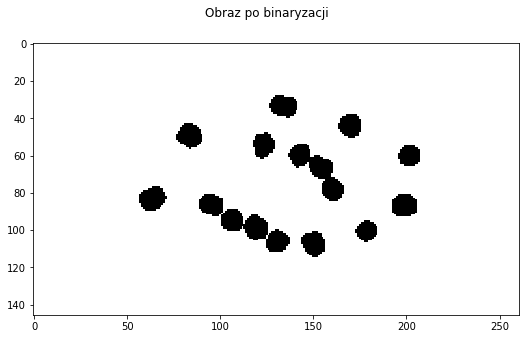

In [7]:
pom = filters.threshold_otsu(image2)
print('Prog binaryzacji wynosi: ',pom)

binaryzacja = image2 < pom
plt.figure(figsize=(10,5))
plt.imshow(binaryzacja, cmap='binary')
plt.axis('on')
plt.suptitle('Obraz po binaryzacji')
plt.show()

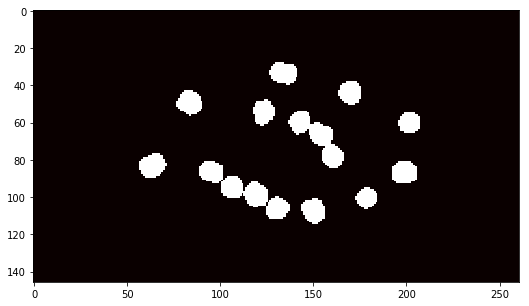

Analizowane obiekty stanowią  5.3324935705663155 % obszaru zdjecia


In [8]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

obiekty_l, nb_l = ndi.label(binaryzacja)

rozmiar = np.bincount(obiekty_l.ravel())
rozmiar_maski = rozmiar > 20
rozmiar_maski[0] = 0

figura = rozmiar_maski[obiekty_l]


plt.figure(figsize=(10,5))
plt.imshow(figura, cmap="hot")
plt.axis('on')
plt.show()


def count_black_white(image):
    a,b = image.shape
    black = 0
    white = 0
    
    for i in range(a):
        for j in range(b):
            if image [i,j] == 1:
                white+=1
            elif image[i,j] == 0:
                black +=1
    return (white*100)/(white+black)

obszar=count_black_white(figura)

print('Analizowane obiekty stanowią ',obszar,'% obszaru zdjecia')

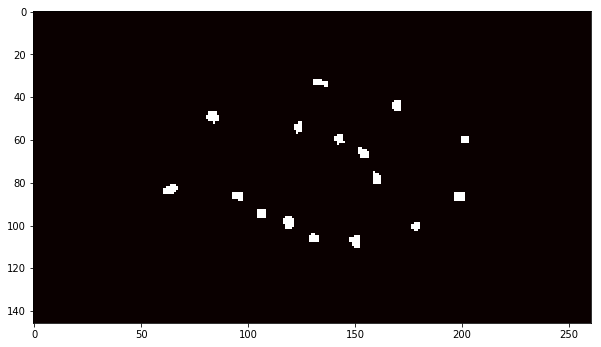

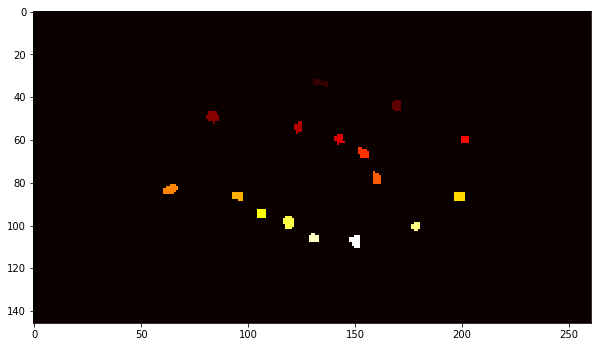

Ilość obiektow: 16


In [9]:
from skimage.morphology import binary_erosion

def smalling(image):
    for i in range(4):
        image = binary_erosion(image)
    return image

ok=smalling(obiekty_l)
plt.figure(figsize=(10,10))
plt.imshow(ok, cmap="hot")
plt.axis('on')

obiekty_ll, nb_ll = ndi.label(ok)

plt.figure(figsize=(10,10))
plt.imshow(obiekty_ll, cmap="hot")
plt.axis('on')
plt.show()

print('Ilość obiektow:',nb_ll)

In [10]:
def Figury_punkty(obiekt, numer):
    
    punkt = []
    for i in range(obiekt.shape[0]):
        for j in range(obiekt.shape[1]):
            if obiekt[i,j] == numer:
                punkt.append((i,j))

    return punkt

def srodek_ciezkosci(punkt):
    a=0
    b=0
    for (i,j) in punkt:
        a = a + j
        b = b + i
    a = a/len(punkt)
    b = b/len(punkt)
    
    return [b, a]



def Blair_Bliss(punkty):
    
    p = len(punkty)
    a,b = srodek_ciezkosci(punkty)
    
    k = 0
    for punkt in punkty:
         k = k + distance.euclidean(punkt,(a,b))**2
            
    return p/(math.sqrt(2*math.pi*k))

def Feret(punkty):
    
    a = [x for (y,x) in punkty]
    b = [y for (y,x) in punkty]
    
    aa = max(a) - min(a)
    bb = max(b) - min(b)
    
    return float(bb)/float(aa)  


for i in range(nb_ll):
    punkcik = Figury_punkty(obiekty_ll, i+1)
    BB = Blair_Bliss(punkcik)
    ft = Feret(punkcik)
    
    print('Liczba punktow: ',len(punkcik),' Srodek ciezkosci: ', srodek_ciezkosci(punkcik), ' Blair-Bliss: ', BB,' Feret: ',ft)

Liczba punktow:  20  Srodek ciezkosci:  [33.35, 133.95]  Blair-Bliss:  0.7998867836769695  Feret:  0.5
Liczba punktow:  18  Srodek ciezkosci:  [44.0, 169.66666666666666]  Blair-Bliss:  0.9958201254954682  Feret:  1.3333333333333333
Liczba punktow:  26  Srodek ciezkosci:  [49.26923076923077, 83.61538461538461]  Blair-Bliss:  0.9922805322199575  Feret:  1.0
Liczba punktow:  18  Srodek ciezkosci:  [54.27777777777778, 123.66666666666667]  Blair-Bliss:  0.962945670195461  Feret:  1.6666666666666667
Liczba punktow:  16  Srodek ciezkosci:  [59.75, 142.8125]  Blair-Bliss:  0.9684955676773397  Feret:  1.0
Liczba punktow:  12  Srodek ciezkosci:  [60.0, 201.5]  Blair-Bliss:  0.9982225900859755  Feret:  0.6666666666666666
Liczba punktow:  19  Srodek ciezkosci:  [66.21052631578948, 153.94736842105263]  Blair-Bliss:  0.946709691661149  Feret:  1.0
Liczba punktow:  20  Srodek ciezkosci:  [77.95, 160.35]  Blair-Bliss:  0.9570787180119201  Feret:  1.6666666666666667
Liczba punktow:  27  Srodek ciezkosc